In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'index_spoofer_scenario_2.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
df.head()
df.reset_index(inplace = True)

In [3]:
df['indexers'][2][1].holdings

0

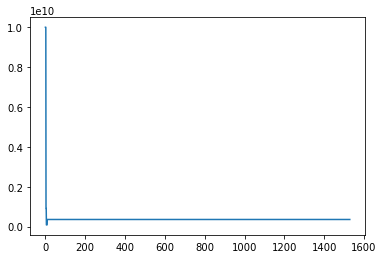

In [4]:
import matplotlib.pyplot as plt
GRT_list = []
for i in df['indexers']:
    GRT_list.append(i[1].GRT)
plt.plot(df.index, GRT_list)

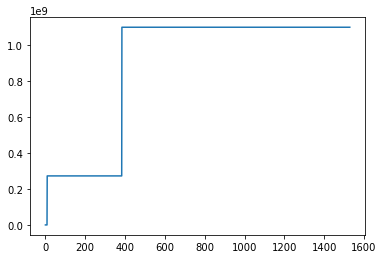

In [5]:
holdings_list = []
for i in df['indexers']:
    if i[1].holdings is not None:
        holdings_list.append(i[1].holdings)
    else:
        holdings_list.append(0)
plt.plot(df.index, holdings_list)

In [6]:
for i in df['indexers'][1500]['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].subgraphs.keys():
    if 1 in df['indexers'][1500]['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].subgraphs[i].allocations.keys():
        print(df['indexers'][1500]['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].subgraphs[i].allocations)

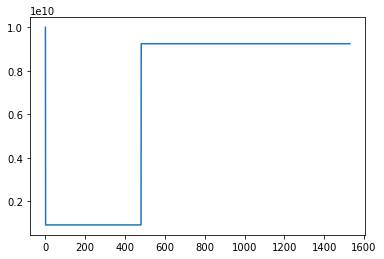

In [7]:
holdings_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        holdings_list.append(0)
    else:
        holdings_list.append(i[1].delegators[1].holdings)
plt.plot(df.index, holdings_list)

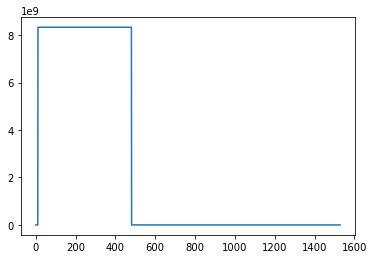

In [8]:
undelegated_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        undelegated_list.append(0)
    else:
        undelegated_list.append(i[1].delegators[1].undelegated_tokens)
plt.plot(df.index, undelegated_list)

Here we see that the agent undelegates after setting the index reward to 0.

In [9]:
df['indexers'][1234][1].indexer_revenue_cut

Decimal('0.99899999999999999911182158029987476766109466552734375')

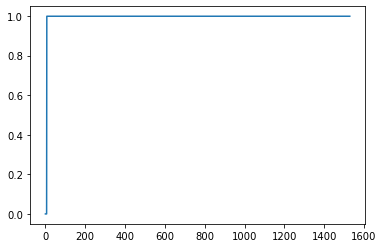

In [10]:
subgraph_list = []
for i in df['indexers']:
    if i[1].indexer_revenue_cut == None:
        subgraph_list.append(0)
    else:
        subgraph_list.append(i[1].indexer_revenue_cut)
plt.plot(df.index, subgraph_list)

Here we see that the indexer revenue cut stays at 1, as the indexer is not allowed to change from their initial cut. 

10000000000
10000000000


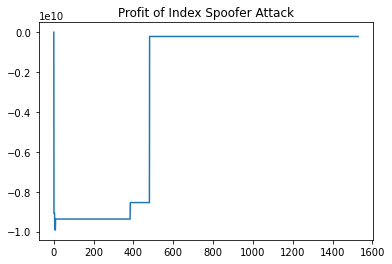

In [11]:
profit_list = []
initial_GRT = df['indexers'][0][1].GRT
initial_holdings = df['indexers'][0][1].delegators[1].holdings
print(initial_GRT)
print(initial_holdings)
for i in df['indexers']:
    if i[1].holdings is not None:
        profit_list.append(i[1].holdings + i[1].GRT + i[1].delegators[1].holdings + i[1].cumulative_deposited_stake \
         - initial_GRT - initial_holdings)
    else:
        profit_list.append(0)
plt.plot(df.index, profit_list)
plt.title('Profit of Index Spoofer Attack');

Here we see that the indexer is unable to profit as they are unable to change their cut after closing the allocation. 